# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [133]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [134]:
data = pd.read_csv('affair_data.csv')
data.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  affair  
0              5.0       1  
1              4.0       1  
2              5.0       1  
3              5.0       1  
4              4.0       1

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


Формируем набор признаков и целевую переменную

In [136]:
X = pd.get_dummies(data[['rate_marriage','religious','educ','occupation','occupation_husb']], columns = ['rate_marriage','religious','educ','occupation','occupation_husb'])

In [137]:
X.head()

rate_marriage_1.0  rate_marriage_2.0  rate_marriage_3.0  rate_marriage_4.0  \
0                  0                  0                  1                  0   
1                  0                  0                  1                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   rate_marriage_5.0  religious_1.0  religious_2.0  religious_3.0  \
0                  0              0              0              1   
1                  0              1              0              0   
2                  0              1              0              0   
3                  0              0              0              1   
4                  1              1              0              0   

   religious_4.0  educ_9.0  ...  occupation_3.0  occupation_4.0  \
0              0         0  ...               0               0   
1              0         0  ...               1               0   
2              0         0  ...               1               0   
3              0         0  ...               0               0   
4              0         0  ...               1               0   

   occupation_5.0  occupation_6.0  occupation_husb_1.0  occupation_husb_2.0  \
0               0               0                    0                    0   
1               0               0                    0                    0   
2               0               0                    0                    0   
3               1               0                    0                    0   
4               0               0                    0                    0   

   occupation_husb_3.0  occupation_husb_4.0  occupation_husb_5.0  \
0                    0                    0                    1   
1                    0                    1                    0   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    1                    0   

   occupation_husb_6.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 27 columns]

In [138]:
Y = data['affair']

In [139]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [141]:
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [142]:
predictions = model.predict_proba(X_test)

In [143]:
for line in zip( predictions[:, 1], Y_test ):
    print( line )

(0.6908511005714757, 0)
(0.08213155880258326, 0)
(0.30150349330489307, 0)
(0.14055331832671186, 0)
(0.332667967104502, 1)
(0.1066282126395346, 0)
(0.24529454817187962, 0)
(0.28694328885894166, 0)
(0.6586549518561317, 1)
(0.19313707982229514, 0)
(0.1134665098948803, 0)
(0.15663494717923895, 0)
(0.1134665098948803, 0)
(0.4324838492078107, 0)
(0.7540336485676364, 1)
(0.41571151096694964, 0)
(0.270921914302358, 0)
(0.6855319496482754, 1)
(0.23209150285011101, 0)
(0.13482262561595537, 0)
(0.21463928591387288, 1)
(0.41467529443060935, 1)
(0.1204492412158247, 1)
(0.44615126459409743, 1)
(0.26949242954585884, 0)
(0.1399508067835782, 0)
(0.4662288510641146, 0)
(0.26949242954585884, 0)
(0.36245881224292026, 0)
(0.0873070475077286, 0)
(0.18310265591925182, 0)
(0.36245881224292026, 1)
(0.22578981093192604, 0)
(0.641624723080109, 1)
(0.5337970538481235, 1)
(0.5337970538481235, 1)
(0.18802334475226046, 0)
(0.20866155763376967, 0)
(0.23481595717147963, 1)
(0.18996969839274694, 0)
(0.5454406503112684,

In [144]:
model.score(X_test, Y_test)

0.7146596858638743

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

### Оценка качества модели

Считаем accuracy последней модели

In [145]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [146]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7146596858638743

In [147]:
precision = tp / (tp + fp)
precision

0.5842391304347826

### Используем готовые библиотеки

In [148]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [149]:
pr, rc, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [150]:
pr

array([0.31796752, 0.31761006, 0.31777661, 0.31794334, 0.31811024,
       0.31827731, 0.31861199, 0.31894737, 0.31858873, 0.31909283,
       0.31942978, 0.31957672, 0.31921652, 0.31972428, 0.3198939 ,
       0.32006369, 0.32023367, 0.32057416, 0.32074468, 0.32053333,
       0.32070438, 0.3208756 , 0.32104701, 0.32173448, 0.32171582,
       0.32188841, 0.32223416, 0.32275417, 0.32292788, 0.32310178,
       0.32345013, 0.3236246 , 0.32379924, 0.32397408, 0.32449973,
       0.32467532, 0.32448537, 0.32501356, 0.32519001, 0.32536665,
       0.32554348, 0.32535365, 0.32588556, 0.32624113, 0.32676519,
       0.32694414, 0.32727273, 0.32763376, 0.32835821, 0.32853982,
       0.33018344, 0.33036707, 0.33202907, 0.33258679, 0.33277311,
       0.33258553, 0.33352081, 0.3337085 , 0.3338964 , 0.33408451,
       0.33427442, 0.33522405, 0.3354143 , 0.33560477, 0.33579545,
       0.33617747, 0.33636881, 0.33675214, 0.33771429, 0.33829422,
       0.33791523, 0.33830275, 0.33908046, 0.33870968, 0.33910

In [151]:
# посмотрим что получилось
for line in zip( pr, rc, thres ):
    print( line )

(0.31796752226296493, 1.0, 0.04964668994134092)
(0.31761006289308175, 0.9983525535420099, 0.05136465431286861)
(0.3177766124803356, 0.9983525535420099, 0.05418630632411999)
(0.3179433368310598, 0.9983525535420099, 0.05727487915989444)
(0.31811023622047246, 0.9983525535420099, 0.06485412680626605)
(0.3182773109243697, 0.9983525535420099, 0.06966152595750866)
(0.3186119873817035, 0.9983525535420099, 0.06983515661662841)
(0.31894736842105265, 0.9983525535420099, 0.07005658652578209)
(0.3185887309110058, 0.9967051070840197, 0.072019594051863)
(0.3190928270042194, 0.9967051070840197, 0.07252546867721921)
(0.3194297782470961, 0.9967051070840197, 0.0735635669644988)
(0.31957671957671957, 0.9950576606260296, 0.07374615247649455)
(0.31921651667548967, 0.9934102141680395, 0.07657472734104798)
(0.3197242841993637, 0.9934102141680395, 0.07892056139300363)
(0.31989389920424405, 0.9934102141680395, 0.08156457292910406)
(0.3200636942675159, 0.9934102141680395, 0.08176651617754781)
(0.3202336696760489

In [152]:
len(rc), len(pr)

(710, 710)

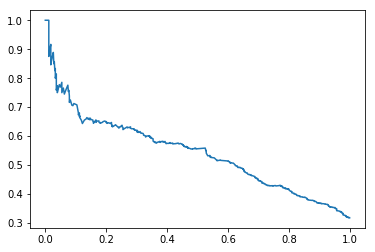

In [153]:
plt.plot( rc, pr )

In [154]:
from sklearn.metrics import average_precision_score

In [155]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.543480166323002

### ROC

In [156]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [157]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [158]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.8299619427755514)
(0.0, 0.0016474464579901153, 0.8299619427755515)
(0.0, 0.011532125205930808, 0.7829989066907537)
(0.0007674597083653108, 0.011532125205930808, 0.7793325082561392)
(0.0007674597083653108, 0.018121911037891267, 0.7691878822678914)
(0.0015349194167306216, 0.018121911037891267, 0.7687124419303972)
(0.0015349194167306216, 0.026359143327841845, 0.7593814276935654)
(0.0023023791250959325, 0.02800658978583196, 0.7573727734242981)
(0.0023023791250959325, 0.029654036243822075, 0.7554302858676759)
(0.0030698388334612432, 0.03130148270181219, 0.7540336485676364)
(0.0030698388334612432, 0.032948929159802305, 0.7530371109402271)
(0.003837298541826554, 0.032948929159802305, 0.7489521638862916)
(0.003837298541826554, 0.036243822075782535, 0.7438008327038097)
(0.005372217958557176, 0.036243822075782535, 0.7353013702537567)
(0.005372217958557176, 0.039538714991762765, 0.733305236894378)
(0.0061396776669224865, 0.039538714991762765, 0.7319831279592727)
(0.006139677666922486

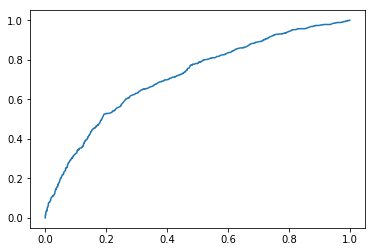

In [159]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [160]:
X.head()

rate_marriage_1.0  rate_marriage_2.0  rate_marriage_3.0  rate_marriage_4.0  \
0                  0                  0                  1                  0   
1                  0                  0                  1                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   rate_marriage_5.0  religious_1.0  religious_2.0  religious_3.0  \
0                  0              0              0              1   
1                  0              1              0              0   
2                  0              1              0              0   
3                  0              0              0              1   
4                  1              1              0              0   

   religious_4.0  educ_9.0  ...  occupation_3.0  occupation_4.0  \
0              0         0  ...               0               0   
1              0         0  ...               1               0   
2              0         0  ...               1               0   
3              0         0  ...               0               0   
4              0         0  ...               1               0   

   occupation_5.0  occupation_6.0  occupation_husb_1.0  occupation_husb_2.0  \
0               0               0                    0                    0   
1               0               0                    0                    0   
2               0               0                    0                    0   
3               1               0                    0                    0   
4               0               0                    0                    0   

   occupation_husb_3.0  occupation_husb_4.0  occupation_husb_5.0  \
0                    0                    0                    1   
1                    0                    1                    0   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    1                    0   

   occupation_husb_6.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 27 columns]

In [161]:
Xshort = data.loc[ :, ['age', 'children'] ]
Xshort.head()

age  children
0  32.0       3.0
1  27.0       3.0
2  22.0       0.0
3  37.0       4.0
4  27.0       1.0

In [162]:
model2 = LogisticRegression()

In [163]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [164]:
model2.fit( X_train_short, Y_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
predictions2 = model2.predict_proba( X_test_short )

In [166]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

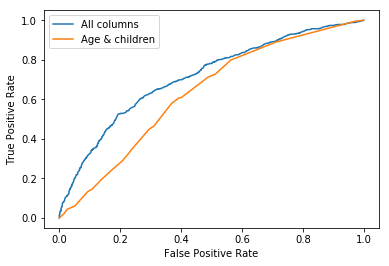

In [167]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [168]:
from sklearn.metrics import roc_auc_score

In [169]:
roc_auc_score( Y_test, predictions[:, 1] )

0.713724253117568

In [170]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [171]:
from sklearn.metrics import auc

In [172]:
auc( fpr, tpr )

0.713724253117568

In [173]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [174]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [175]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [176]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [177]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

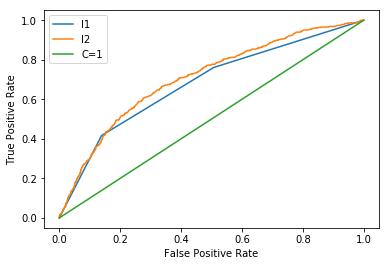

In [178]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [179]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

age_17.5  age_22.0  age_27.0  age_32.0  age_37.0  age_42.0  children_0.0  \
0         0         0         0         1         0         0             0   
1         0         0         1         0         0         0             0   
2         0         1         0         0         0         0             1   
3         0         0         0         0         1         0             0   
4         0         0         1         0         0         0             0   

   children_1.0  children_2.0  children_3.0  children_4.0  children_5.5  
0             0             0             1             0             0  
1             0             0             1             0             0  
2             0             0             0             0             0  
3             0             0             0             1             0  
4             1             0             0             0             0

In [180]:
Y = data['affair']

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [182]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [183]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [184]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

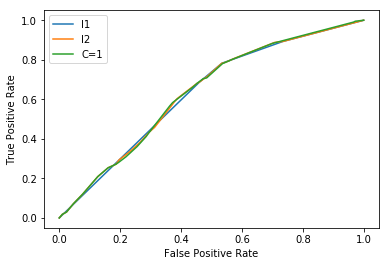

In [185]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()